In [1]:
import torch

def normalize(x: torch.Tensor) -> torch.Tensor:
    """
    Assuming the input x is a Pytorch tensor with shape (N, c, n_x, n_y), it normalizes it
    with min-max normalization and returns a tensor with the same shape, in the range [0, 1].
    """
    M, m = x.max(dim=0, keepdim=True)[0], x.min(dim=0, keepdim=True)[0]
    return (x - m) / (M - m)

In [2]:
# Convert a tensor x to float32
x = torch.tensor([1, 2, 3])
x = x.to(torch.float32)

In [3]:
import glob

import torch
from torch.utils.data import Dataset
from torchvision import transforms

from PIL import Image
import numpy as np

class MayoDataset(Dataset):
    def __init__(self, data_path, data_shape):
        super().__init__()

        self.data_path = data_path
        self.data_shape = data_shape

        # We expect data_path to be like "./data/Mayo/train" or "./data/Mayo/test"
        self.fname_list = glob.glob(f"{data_path}/*/*.png")

    def __len__(self):
        return len(self.fname_list)
    
    def __getitem__(self, idx):
        # Load the idx's image from fname_list
        img_path = self.fname_list[idx]

         # To load the image as grey-scale
        x = Image.open(img_path).convert("L")

        # Convert to numpy array -> (512, 512)
        x = np.array(x) 

        # Convert to pytorch tensor -> (1, 512, 512) <-> (c, n_x, n_y)
        x = torch.tensor(x).unsqueeze(0)

        # Resize to the required shape
        x = transforms.Resize(self.data_shape)(x) # (1, n_x, n_y)

        # Normalize in [0, 1] range
        x = (x - x.min()) / (x.max() - x.min())

        return x

    def get_patient_and_slice(self, idx):
        """
        A utility function. Given an idx, it returns the patient ID and the number of slice of
        that patient corresponding to the idx's datapoint.
        """
        fname = self.fname_list[idx]
        patient_id = fname.split('/')[-2]
        slice_n = fname.split('/')[-1]
        return patient_id, slice_n

torch.Size([4, 1, 256, 256])


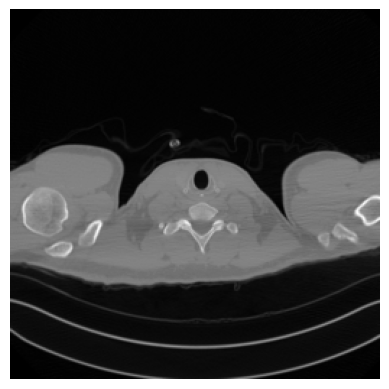

In [4]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define dataset and dataloader (only train for now)
train_data = MayoDataset(data_path="../data/Mayo/train", data_shape=256)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

# Get a sample batch
x = next(iter(train_loader))
print(x.shape)

# Visualize the sample with matplotlib (different everytime!)
plt.imshow(x[0].squeeze(), cmap='gray')
plt.axis('off')
plt.show()